In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv("employee_shortlisting.csv")

In [61]:
df.head()

,Interview_Score,Skills_Matched,Shortlisted
0,8.730597,3.245203,Yes
1,6.070919,2.105576,No
2,8.254656,2.682729,Yes
3,6.136732,2.777711,No
4,8.785921,3.233440,Yes


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
# df = pd.DataFrame({'Shortlisted': ["Yes", "No", "Yes", "No"]})
df['Shortlisted_'] = df['Shortlisted'].map({'No': 0, 'Yes': 1})

In [64]:
df.head()

,Interview_Score,Skills_Matched,Shortlisted,Shortlisted_
0,8.730597,3.245203,Yes,1
1,6.070919,2.105576,No,0
2,8.254656,2.682729,Yes,1
3,6.136732,2.777711,No,0
4,8.785921,3.233440,Yes,1


In [65]:
df.drop('Shortlisted', axis=1, inplace=True)

In [66]:
df.head()

,Interview_Score,Skills_Matched,Shortlisted_
0,8.730597,3.245203,1
1,6.070919,2.105576,0
2,8.254656,2.682729,1
3,6.136732,2.777711,0
4,8.785921,3.233440,1


In [67]:
df.shape

(500, 3)

<Axes: xlabel='Interview_Score', ylabel='Skills_Matched'>

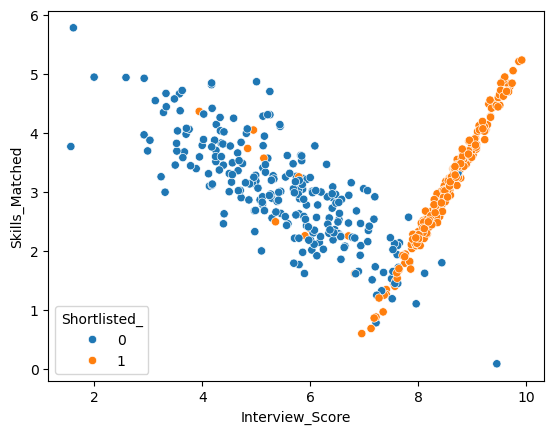

In [68]:
sns.scatterplot(x=df['Interview_Score'], y=df['Skills_Matched'], hue=df['Shortlisted_'])

In [69]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [70]:
y

0      1
1      0
2      1
3      0
4      1
      ..
495    1
496    0
497    1
498    1
499    1
Name: Shortlisted_, Length: 500, dtype: int64

 ## Perceptron model

In [71]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [72]:
p.fit(X,y)

Perceptron()

In [73]:
p.coef_

array([[23.24913045,  4.42685878]])

In [74]:
p.intercept_

array([-144.])

In [75]:
!pip install mlxtend

In [76]:
from mlxtend.plotting import plot_decision_regions

C:\Users\4suna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

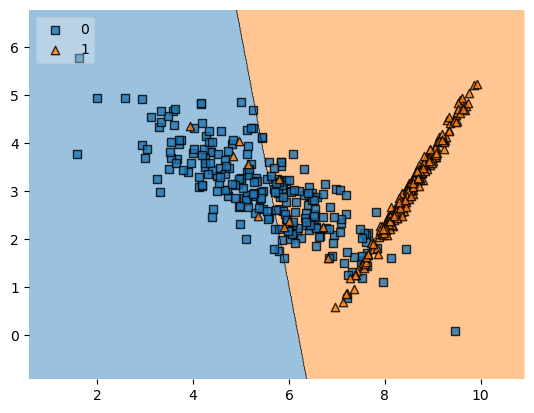

In [77]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [78]:
df.head()

,Interview_Score,Skills_Matched,Shortlisted_
0,8.730597,3.245203,1
1,6.070919,2.105576,0
2,8.254656,2.682729,1
3,6.136732,2.777711,0
4,8.785921,3.233440,1


In [79]:
df.drop('Skills_Matched', axis=1, inplace=True)

In [80]:
df.head()

,Interview_Score,Shortlisted_
0,8.730597,1
1,6.070919,0
2,8.254656,1
3,6.136732,0
4,8.785921,1


In [81]:
df.shape

(500, 2)

# perception trick

In [82]:
from sklearn.datasets import make_classification

In [83]:
X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [84]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0], weights[1:]
                     


In [100]:
np.dot(np.insert(X[41],0,1),[1,1,1])

0.2946000908036749

In [102]:
step(-0.2946)

0

In [103]:
def step(z):
    return 1 if z>0 else 0

In [104]:
intercept_,coef_ = perceptron(X,y)

In [105]:
print(coef_)

[1.36670868 0.13533252]


In [106]:
print(intercept_)

0.9


In [107]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [108]:
X_input = np.linspace(-3,3,100)

In [109]:
y_input = m*X_input + b

In [110]:
print(f"X_input shape: {X_input.shape}, y_input shape: {y_input.shape}")


X_input shape: (100,), y_input shape: (100,)


ValueError: x and y must be the same size

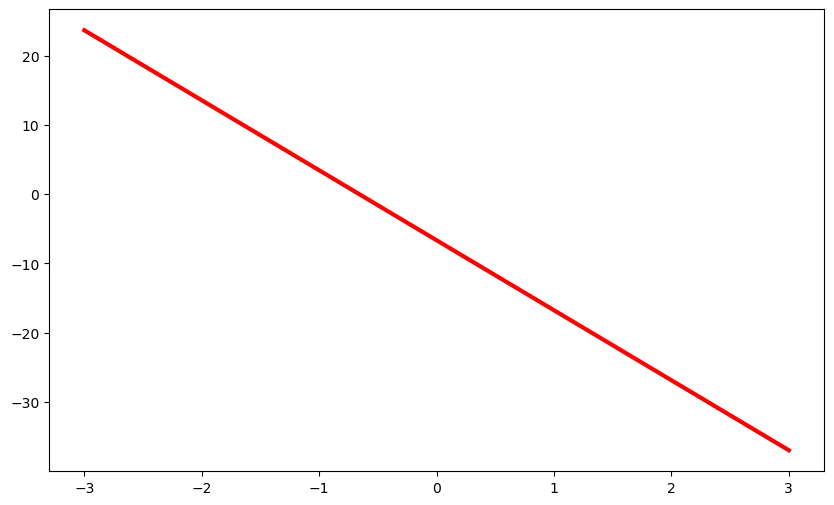

In [114]:
plt.figure(figsize=(10,6))
plt.plot(X_input_fixed, y_input_fixed, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y[:min_length], cmap='winter', s=100)
plt.ylim(-3, 2)